In [1]:
from aart_func import *
from params import * 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject



Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



As usual, let us get the geometry. From Examples.ipynb, we know how AART works. We need to get lensing bands and the ratracing information.

In [2]:
%time !python lensingbands.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  6250000
Number of points in the n=1 grid  6250000
Number of points in the n=2 grid  6250000
File  ./Results/LensingBands_a_0.94_i_17.h5  created.
CPU times: user 187 ms, sys: 78 ms, total: 265 ms
Wall time: 37.5 s


In [3]:
%time !python raytracing.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.94_i_17.h5  created.

A total of 18750000 photons were ray-traced
CPU times: user 319 ms, sys: 133 ms, total: 452 ms
Wall time: 1min


We will now load what we need. 

In [4]:
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]

#The grid points for each lensing band
N0=int(h5f["N0"][0])
lim0=int(h5f["lim0"][0])

h5f.close()

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5


# From an analytical prescribed hotspot

Let us start by raytracing a hotspot that is prescribed analytically. We will assume it is a Gaussian blob at radius=radhs with angular frequency=velhs, moving on a circular orbit. All the parameters are specified in *intensity_f.py*. 

In [5]:
%time !python hotspot.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Intensity for a Flare
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
Calculating an image at time t=2.18182 (M)
Calculating an image at time t=0.0 (M)
Calculating an image at time t=1.09091 (M)
Calculating an image at time t=3.27273 (M)
Calculating an image at time t=4.36364 (M)
Calculating an image at time t=5.45455 (M)
Calculating an image at time t=6.54545 (M)
Calculating an image at time t=7.63636 (M)
Calculating an image at time t=8.72727 (M)
Calculating an image at time t=9.81818 (M)
Calculating an image at time t=10.90909 (M)
Calculating an image at time t=12.0 (M)
File  ./Results/Intensities_a_0.94_i_17_rhs_8_velhs_0.05_rwidth_0.5.h5  created.
CPU times: us

Let us now load the results

In [6]:
fimages="./Results/Intensities_a_%s_i_%s_rhs_%s_velhs_%s_rwidth_%s.h5"%(spin_case,i_case,radhs,velhs,rwidth)

print("Reading file: ",fimages)

h5f = h5py.File(fimages,'r')

Is0=h5f['bghts0'][:]
Is1=h5f['bghts1'][:]
Is2=h5f['bghts2'][:]

h5f.close()

Reading file:  ./Results/Intensities_a_0.94_i_17_rhs_8_velhs_0.05_rwidth_0.5.h5


And visualize a single snapshot, the first one

In [7]:
tsnap=0
VMAX=np.max(Is0+Is1+Is2)

Text(0, 0.5, '$\\beta$ (M)')

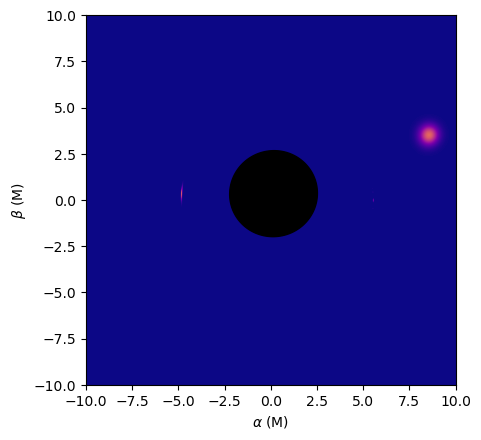

In [8]:
plt.fill(hull_0i[:,0],hull_0i[:,1],color="k")

plt.imshow(Is0[tsnap,:,:]+Is1[tsnap,:,:]+Is2[tsnap,:,:],vmax=VMAX,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])

plt.xlim(-10,10)
plt.ylim(-10,10)

plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")

And produce a movie

In [9]:
fignames=[]
VMAX=np.max(Is0+Is1+Is2)
for tsnap in np.arange(snapshots)[::-1]:
    fig, ax = plt.subplots()
    
    ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
    
    ax.imshow(Is0[tsnap,:,:]+Is1[tsnap,:,:]+Is2[tsnap,:,:],vmax=VMAX,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    
    ax.set_xlabel(r"$\alpha$"+" "+"(M)")
    ax.set_ylabel(r"$\beta$"+" "+"(M)")
    
    fignames.append('Fig%s.png'%tsnap)
    plt.savefig('Fig%s.png'%tsnap,dpi=400,bbox_inches='tight')
    plt.close(fig)

with imageio.get_writer('HotSpotMovie_Analytical.gif', mode='I') as writer:
    for filename in fignames:
        image = imageio.imread(filename)
        writer.append_data(image)

# We delete the created images and just keep the GIF
for filename in set(fignames):
    os.remove(filename)

# From a file containing a hotspot movie

Let us now start by exploring the precomputed hot spot movie (dataset)first. Make <span style="color:blue">**sure**</span> to change the name of the inoisy file in *params.py* to "hotspot.h5". I thank **Sreehari Harikesh** for providing this example data. 

In [10]:
inoisyfile="hotspot.h5"

print("Reading file: ",inoisyfile)

h5f = h5py.File(inoisyfile,'r')

inoisy=np.array(h5f['data/data_env'])

xtstart = np.array(h5f['params/x0start'])
xtend = np.array(h5f['params/x0end'])

x1start = np.array(h5f['params/x1start'])
x2start = np.array(h5f['params/x2start'])
x1end = np.array(h5f['params/x1end'])
x2end = np.array(h5f['params/x2end'])

h5f.close()

Reading file:  hotspot.h5


And visualize a single snapshot. This is to get a sense where the hotspot is and how it is moving, in case we want to compare to an implementation that prescribes the hotspot analytically. 

In [11]:
snap=15

Text(0, 0.5, '$Y$ (M)')

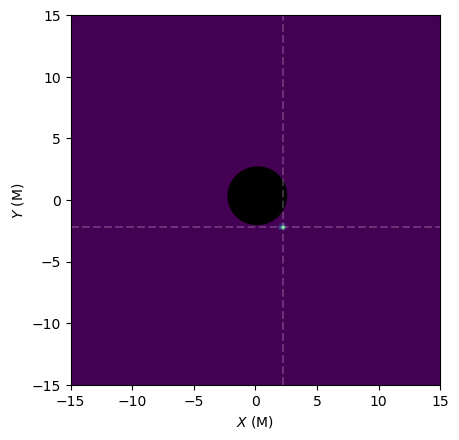

In [12]:
plt.imshow(inoisy[snap],origin="lower",extent=[x1start,np.abs(x1start),x2start,np.abs(x2start)])

plt.fill(hull_0i[:,0],hull_0i[:,1],color="k")

plt.axvline(2.2,color="w",linestyle="--",alpha=0.2)
plt.axhline(-2.2,color="w",linestyle="--",alpha=0.2)

plt.xlabel(r"$X$"+" "+"(M)")
plt.ylabel(r"$Y$"+" "+"(M)")

And a movie, just for fun!

In [13]:
fignames=[]
for tsnap in np.arange(0,int(inoisy.shape[0]),1):
    
    fig, ax = plt.subplots()
    
    ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
    
    ax.imshow(inoisy[tsnap],origin="lower",extent=[x1start,np.abs(x1start),x2start,np.abs(x2start)])
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    
    ax.set_xlabel(r"$X$"+" "+"(M)")
    ax.set_ylabel(r"$Y$"+" "+"(M)")
    
    fignames.append('Fig%s.png'%tsnap)
    plt.savefig('Fig%s.png'%tsnap,dpi=400,bbox_inches='tight')
    plt.close(fig)

with imageio.get_writer('inoisyMovie.gif', mode='I') as writer:
    for filename in fignames:
        image = imageio.imread(filename)
        writer.append_data(image)

# We delete the created images and just keep the GIF
for filename in set(fignames):
    os.remove(filename)

Let us generate a single image, but in the slow light approximation (we use all the dataset information)

In [14]:
%time !python iImages.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing a single image 

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
Reading inoisy file:  hotspot.h5
AART starts!
Using all the available inoisy frames
Computing lensed image using all inoisy frames
Images file  ./Results/Dynamical_Image_a_0.94_i_17.h5  created.
CPU times: user 30.5 ms, sys: 90.3 ms, total: 121 ms
Wall time: 3.58 s


Now we can visualize a single snapshot it

In [15]:
fimages="./Results/Dynamical_Image_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fimages)

h5f = h5py.File(fimages,'r')

I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]

h5f.close()

Reading file:  ./Results/Dynamical_Image_a_0.94_i_17.h5


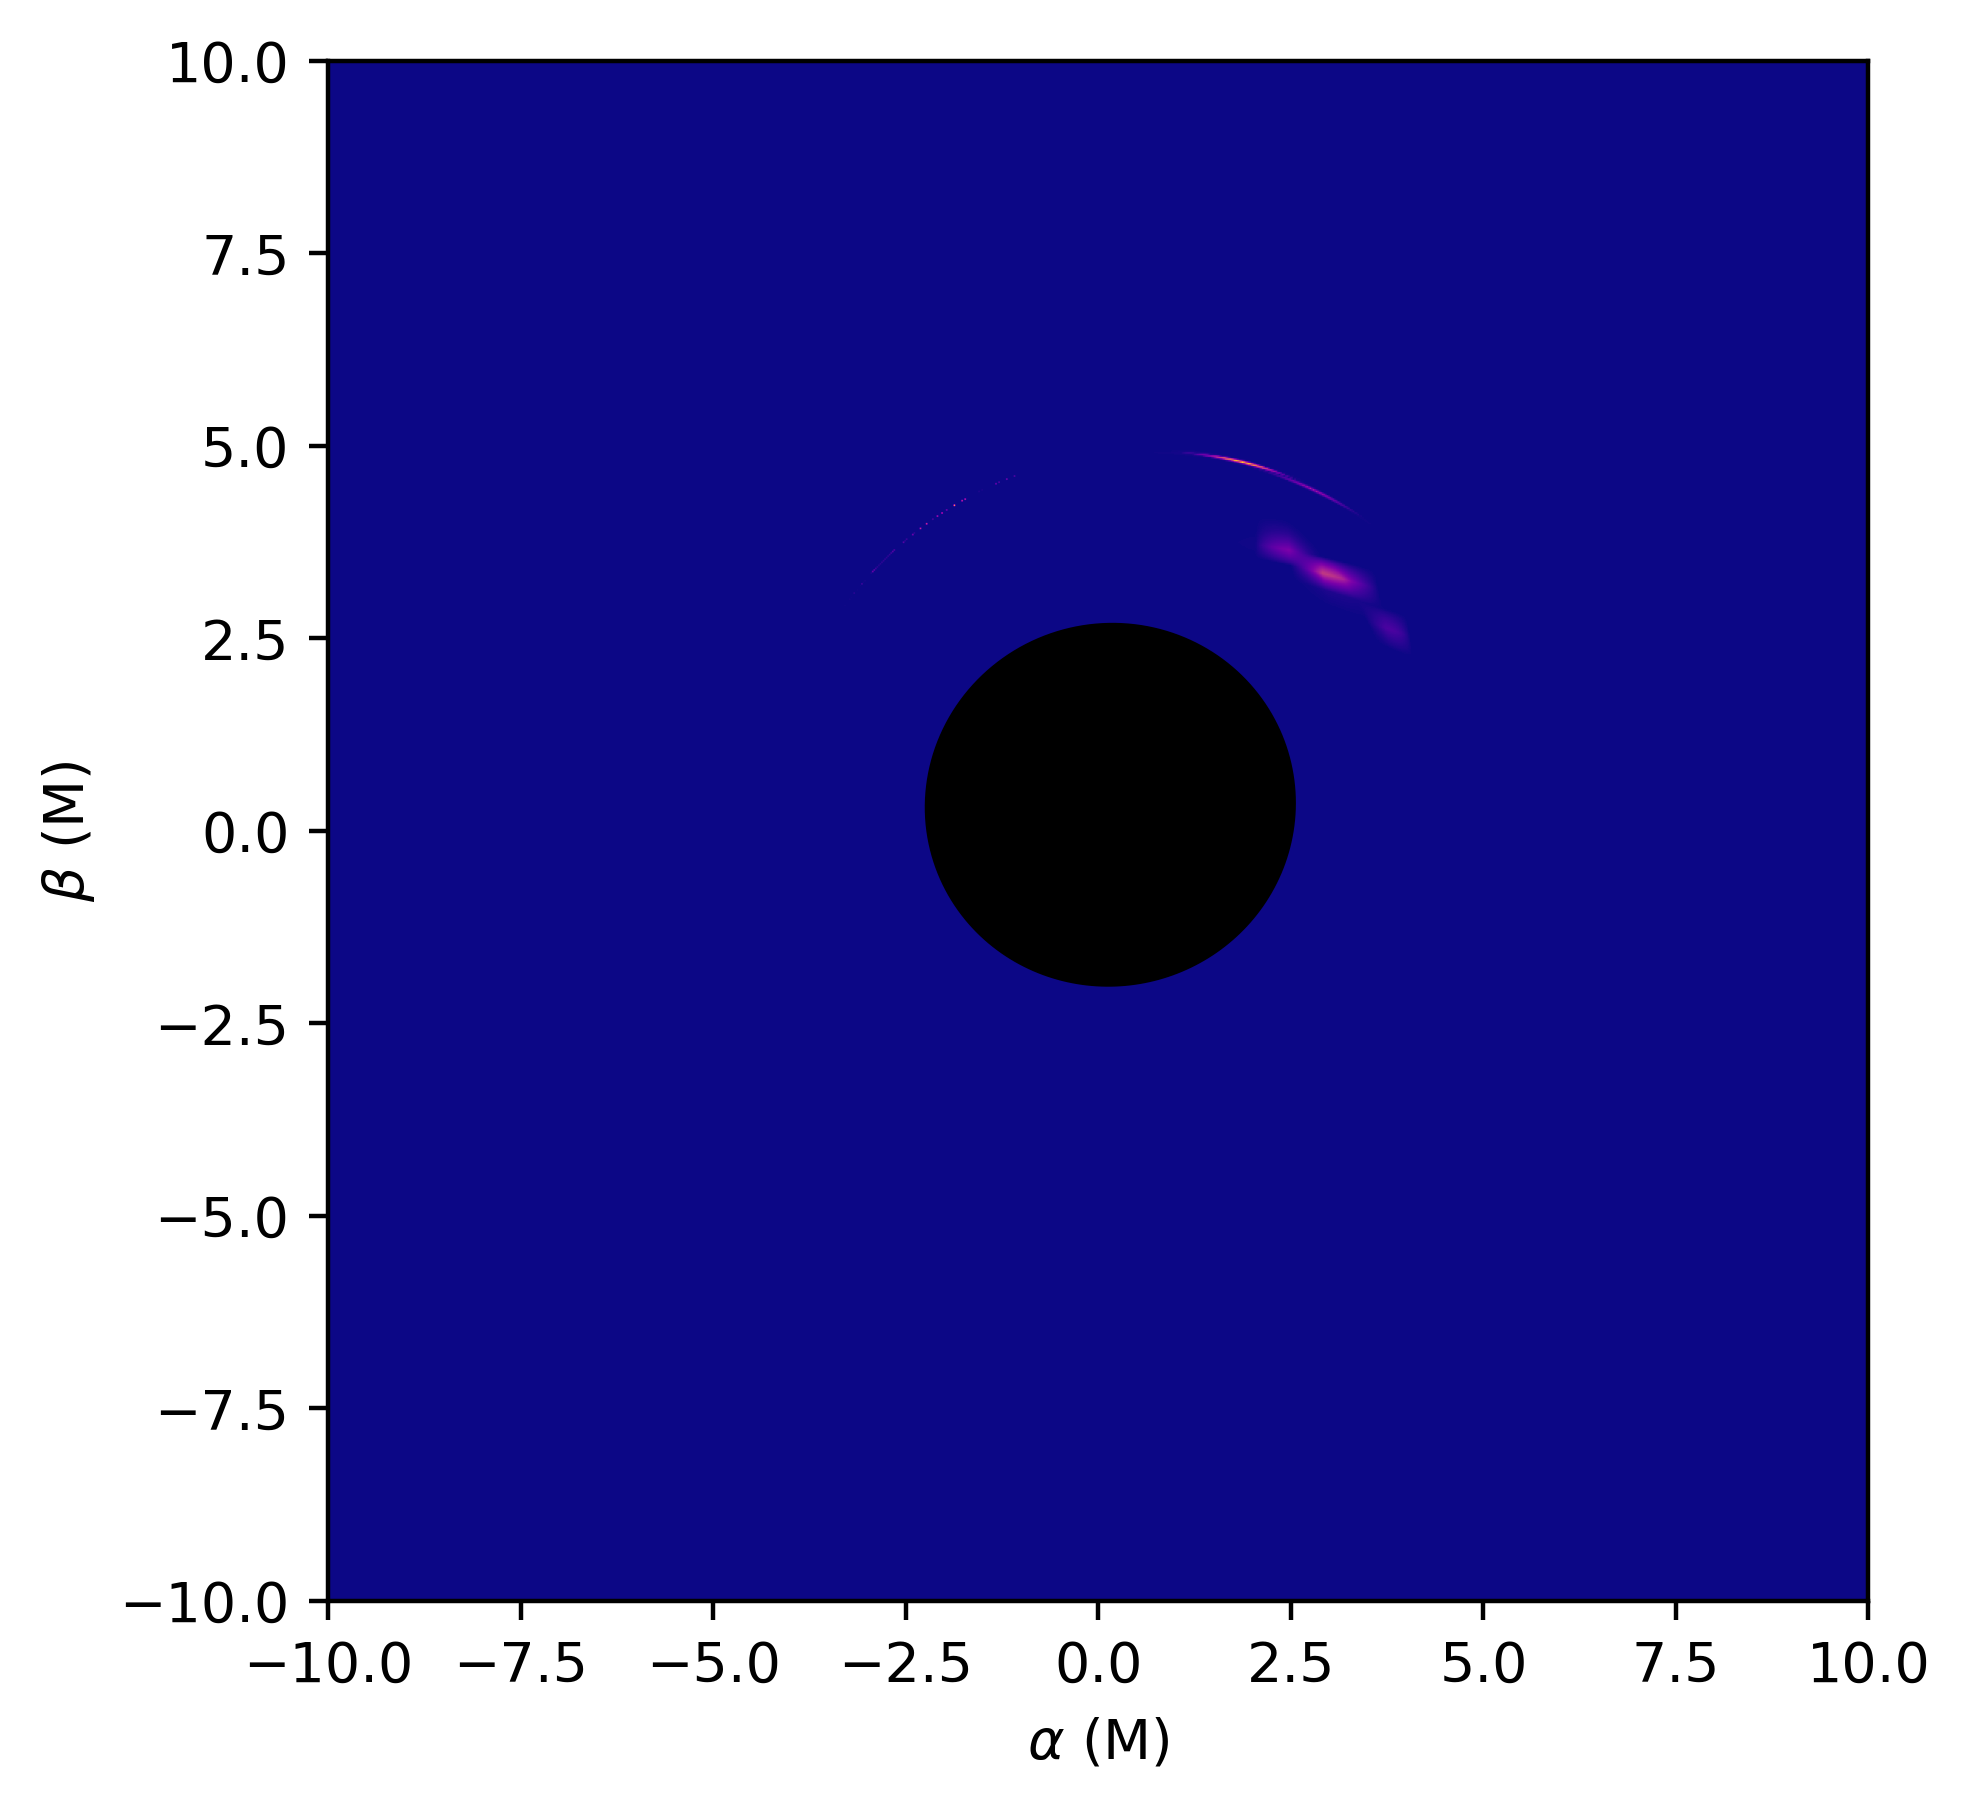

In [16]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")

ax.imshow(I0+I1+I2,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
    
ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

plt.show()

And now run a movie!

In [17]:
%time !python iMovies.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Movies
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
Reading inoisy file:  hotspot.h5
AART starts!
Calculating an image at time t=2.18182 (M)
Calculating an image at time t=1.09091 (M)
Calculating an image at time t=0.0 (M)
Calculating an image at time t=3.27273 (M)
Calculating an image at time t=4.36364 (M)
Calculating an image at time t=5.45455 (M)
Calculating an image at time t=6.54545 (M)
Calculating an image at time t=7.63636 (M)
Calculating an image at time t=8.72727 (M)
Calculating an image at time t=9.81818 (M)
Calculating an image at time t=10.90909 (M)
Calculating an image at time t=12.0 (M)
Images  ./Results/Images_a_0.94_i_17.h5  created.

CPU times: u

In [18]:
fimages="./Results/Images_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fimages)

h5f = h5py.File(fimages,'r')

Is0=h5f['bghts0'][:]
Is1=h5f['bghts1'][:]
Is2=h5f['bghts2'][:]

h5f.close()

Reading file:  ./Results/Images_a_0.94_i_17.h5


In [19]:
VMAX=np.max(Is0+Is1+Is2)

We can still visualize a single snapshot

Text(0, 0.5, '$\\beta$ (M)')

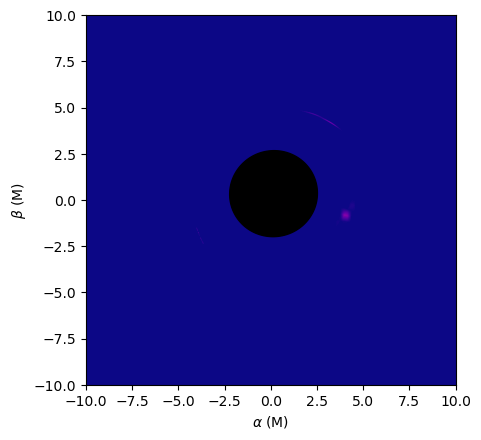

In [20]:
tsnap=0

plt.fill(hull_0i[:,0],hull_0i[:,1],color="k")

plt.imshow(Is0[tsnap,:,:]+Is1[tsnap,:,:]+Is2[tsnap,:,:],vmax=VMAX,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])

plt.xlim(-10,10)
plt.ylim(-10,10)
    
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")

In [21]:
fignames=[]
for tsnap in np.arange(snapshots)[::-1]:
    fig, ax = plt.subplots()
    
    
    ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
    
    ax.imshow(Is0[tsnap,:,:]+Is1[tsnap,:,:]+Is2[tsnap,:,:],vmax=VMAX,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    
    ax.set_xlabel(r"$\alpha$"+" "+"(M)")
    ax.set_ylabel(r"$\beta$"+" "+"(M)")
    
    fignames.append('Fig%s.png'%tsnap)
    plt.savefig('Fig%s.png'%tsnap,dpi=400,bbox_inches='tight')
    plt.close(fig)

with imageio.get_writer('HotSpotMovie.gif', mode='I') as writer:
    for filename in fignames:
        image = imageio.imread(filename)
        writer.append_data(image)

# We delete the created images and just keep the GIF
for filename in set(fignames):
    os.remove(filename)

## License

MIT license

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software 
without restriction, including without limitation the rights to use, copy, modify, merge, 
publish, distribute, sublicense, and/or sell copies of the Software, and to permit 
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR 
PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE 
FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, 
ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN 
THE SOFTWARE.